# Lesson 20 - Support Vector Machines (Part 3)

### Additional Resources
* Hands-On Machine Learning, Ch 5


In [1]:
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import *
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

from ClassificationPlotter import plot_regions
from ipywidgets import *

## Mutli-class Classification with SVMs

When performing multi-class classification with support vector machines, a "one-versus-one" method is applied. A separate binary classifier is trained for each pair of classes, and then classification of observations is performed by running the observation through each of the $n * (n - 1) / 2$ models and then having them vote on the final classification. 

2575


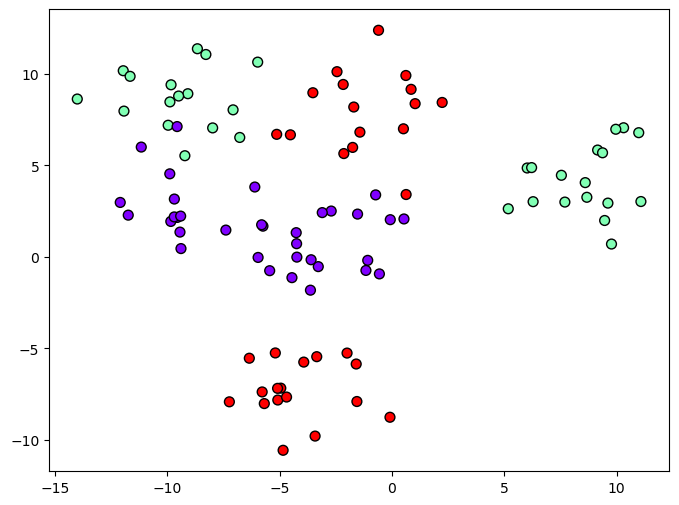

In [5]:
sd = np.random.choice(range(9999))
print(sd)
np.random.seed(9997)
X1, y1 = make_blobs(n_samples=100, centers=6, n_features=2, cluster_std=2)
y1 = np.where(y1%3 == 0, 0, np.where(y1%3 == 1, 1, np.where(y1%3 == 2, 2, y1)))


plt.figure(figsize = [8,6])
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=y1, s=50, edgecolor='k', cmap='rainbow')
plt.show()

When performing **multi-class** classification with the SVC(), a "one-versus-one" method is applied. A separate binary classifier is trained for each pair of classes, and then classification of observations is performed by running the observation through each of the  𝑛∗(𝑛−1)/2  models and then having them vote on the final classification.

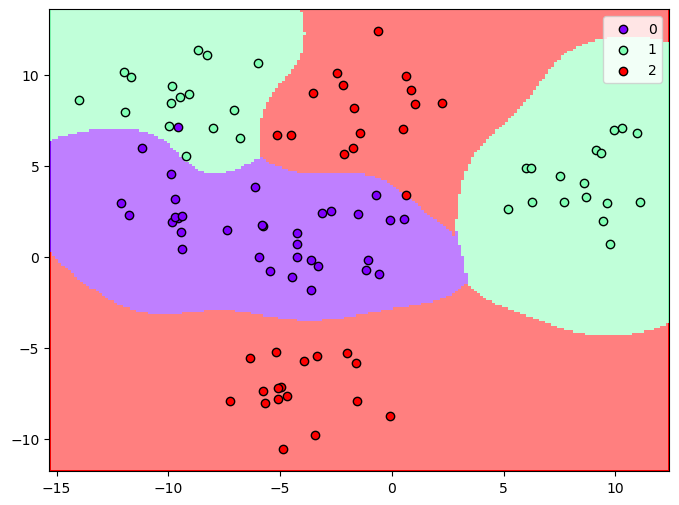

In [8]:
#Using SVC() on multi-class problems is simple.  The implementation detects the number of classes and acts accordingly...
model_all = SVC(kernel='rbf', C=5, gamma=0.1)
model_all.fit(X1, y1)

plot_regions(model_all, X1, y1, fig_size=[8,6], num_ticks=200)

[False  True  True  True  True  True  True False False False  True  True
 False  True  True  True False  True False False False  True  True False
  True  True False  True  True  True  True  True False  True  True False
  True  True False  True  True False False  True False  True  True False
  True False  True  True False  True  True  True False  True False  True
  True False  True  True  True  True  True  True  True False False  True
  True  True  True False  True False  True  True False False  True  True
  True  True  True False False False  True  True  True False  True  True
  True  True  True  True]
[2 1 0 0 0]


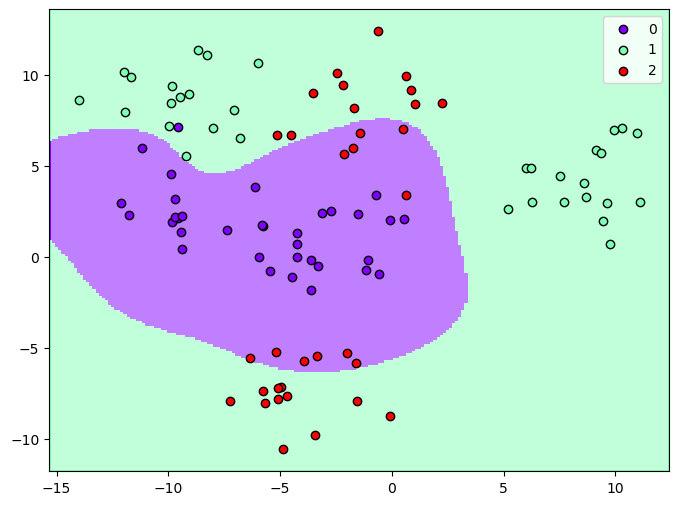

In [9]:
#This explains the working of multi-class SVC() on the pair-by-pair basis  
# Model for purple and green points
sel = y1 != 2
print(sel)
Xpg = X1[sel, :]
ypg = y1[sel]

model_pg = SVC(kernel='rbf', C=5, gamma=0.1)
model_pg.fit(Xpg, ypg)

print(y1[0:5])

plot_regions(model_pg, X1, y1, fig_size=[8,6], num_ticks=200, display=False, close=False)

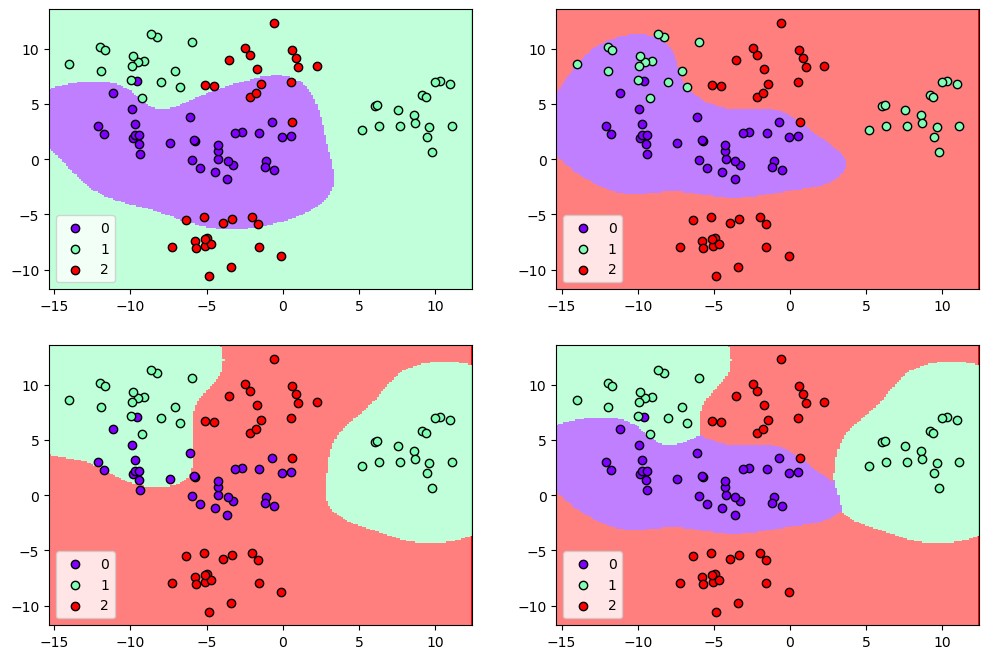

In [10]:
# Model for purple and green points
sel = y1 != 2
Xpg = X1[sel, :]
ypg = y1[sel]

model_pg = SVC(kernel='rbf', C=5, gamma=0.1)
model_pg.fit(Xpg, ypg)

# Model for purple and red points
sel = y1 != 1
Xpr = X1[sel, :]
ypr = y1[sel]

model_pr = SVC(kernel='rbf', C=5, gamma=0.1)
model_pr.fit(Xpr, ypr)

# Model for green and red points
sel = y1 != 0
Xgr = X1[sel, :]
ygr = y1[sel]

model_gr = SVC(kernel='rbf', C=5, gamma=0.1)
model_gr.fit(Xgr, ygr)


plt.figure(figsize=[12,8])
plt.subplot(2,2,1)
plot_regions(model_pg, X1, y1, num_ticks=200, display=False, close=False)
plt.subplot(2,2,2)
plot_regions(model_pr, X1, y1, num_ticks=200, display=False, close=False)
plt.subplot(2,2,3)
plot_regions(model_gr, X1, y1, num_ticks=200, display=False, close=False)
plt.subplot(2,2,4)
plot_regions(model_all, X1, y1, num_ticks=200, display=False, close=False)
plt.show()

## Selecting Hyperparameters in an SVM Model

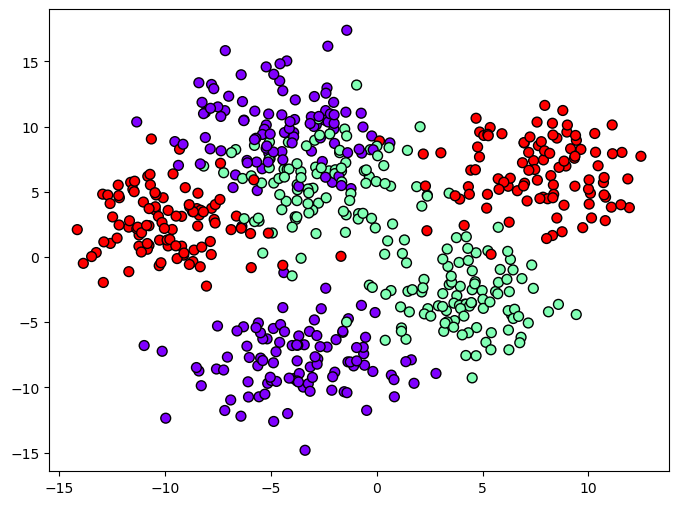

In [11]:
np.random.seed(7248)
X2, y2 = make_blobs(n_samples=600, centers=6, n_features=2, cluster_std=2.4)
y2 = np.where(y2%3 == 0, 0, np.where(y2%3 == 1, 1, np.where(y2%3 == 2, 2, y2)))


plt.figure(figsize = [8,6])
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=y2, s=50, edgecolor='k', cmap='rainbow')
plt.show()

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X2, y2, test_size=0.2, random_state=1)

print(X_train.shape)
print(X_val.shape)

(480, 2)
(120, 2)


In [13]:
log_C_vals = np.linspace(-3, 3, 20)
log_gamma_vals = np.linspace(-3, 3, 20)

params = []
val_acc = []

for log_C in log_C_vals:
    for log_gamma in log_gamma_vals:
        temp_mod = SVC(kernel='rbf', C=10**log_C, gamma=10**log_gamma)
        temp_mod.fit(X_train, y_train)
        
        params.append([10**log_C, 10**log_gamma])
        val_acc.append(temp_mod.score(X_val, y_val))            


In [14]:
idx = np.argsort(val_acc)
idx = np.flip(idx)

top10 = idx[:10]

for i in top10:
    print('Val Acc:', val_acc[i], 'C:', params[i][0], 'gamma:', params[i][1],)


Val Acc: 0.9583333333333334 C: 0.3359818286283781 gamma: 0.008858667904100823
Val Acc: 0.95 C: 54.555947811685144 gamma: 0.001
Val Acc: 0.95 C: 0.07847599703514611 gamma: 0.018329807108324356
Val Acc: 0.95 C: 12.742749857031322 gamma: 0.00206913808111479
Val Acc: 0.95 C: 0.1623776739188721 gamma: 0.018329807108324356
Val Acc: 0.95 C: 0.6951927961775606 gamma: 0.018329807108324356
Val Acc: 0.95 C: 2.976351441631316 gamma: 0.004281332398719396
Val Acc: 0.95 C: 0.3359818286283781 gamma: 0.018329807108324356
Val Acc: 0.95 C: 0.0379269019073225 gamma: 0.018329807108324356
Val Acc: 0.95 C: 0.0379269019073225 gamma: 0.0379269019073225


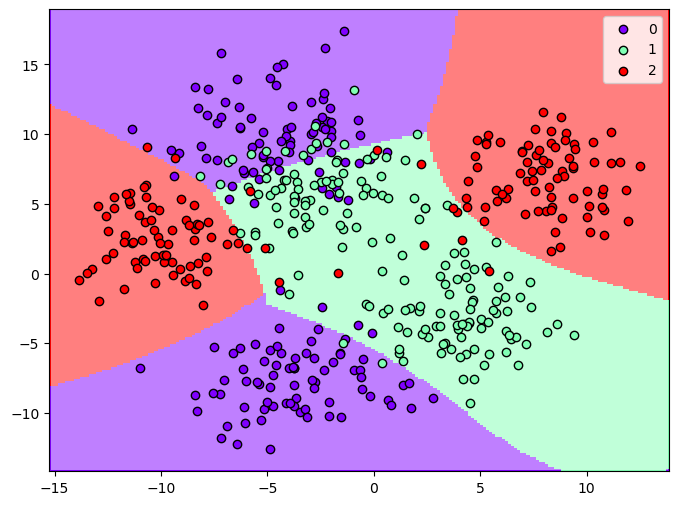

In [15]:
#here we plot the regions using the SVC with optimal parameters (which give the higest validation scoreS)

model = SVC(kernel='rbf', C=0.3360, gamma=0.008859)
model.fit(X_train, y_train)

plot_regions(model, X_train, y_train, fig_size=[8,6], num_ticks=200)
